# Quantum Computing
***
This is a notebook on Quantum Computing.

Quantum Computing has been around since the 1980's when Paul Benioff first proposed it on a turning machine. A quantum computer is meant to simulate things that a normal computer can not feasibly do.

Quantum computers are needed to solve complex problems which can't be done with normal computers, such as poorly explained circumstances.

#### [IBM on Quantum Computing;](https://www.ibm.com/topics/quantum-computing)IBM
#### [Problems Computers can't solve;](https://www.inc.com/magazine/19820301/7600.html)Inc
#### [Intro exercises on Quantum Computing;](https://towardsdatascience.com/what-is-quantum-entanglement-anyway-4ea97df4bb0e)Towardsdatascience

In [60]:
# qiskit is open source for using quantum computting
from qiskit import __version__

# Qiskit Visualisation contains functions that visualizes quantum states and more
import qiskit.visualization as viz

# Generating random numbers.
import numpy as np

# Plotting.
# seaborn is based on matplotlib for data visualization 
import seaborn as sns

# functions for randomising ints
import random

# provides fast way of looping to get different results
import itertools

# provides functions which can manipulate different parts of the Python runtime environment
import sys

# The tools needed
# Register is to define qubits
from qiskit import QuantumRegister, ClassicalRegister

# QuantumCircuit is computational routine
from qiskit import QuantumCircuit

# Aer is a high performance simulator
from qiskit import Aer

from qiskit import execute

# Qiskit.visualization allows to make cool plots 
import qiskit.visualization   
from qiskit.visualization import plot_histogram                                     

In [61]:
# allows us to do quantum simulation of measurements 
M_simulator=Aer.backends(name='qasm_simulator')[0]

#Qubits filled with two
qBits=QuantumRegister(2)

# Classical bits filled also with two
cBits=ClassicalRegister(2)

# Put qBits and cBits together to make a Quantum Circuit, called entangler
entangler=QuantumCircuit(qBits,cBits)

# Apply Hadamard gate to the first qubit 
entangler.h(0)

# Apply the CNOT gate with the first qubit as the control and second qubit as the target
entangler.cx(0,1)

# measure the first qubit and record it
entangler.measure(0,0)

# measure the second qubit and record it 
entangler.measure(1,1)

#entangler.draw(output='mpl')
print(entangler)

       ┌───┐     ┌─┐   
q41_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q41_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
c11: 2/═══════════╩══╩═
                  0  1 


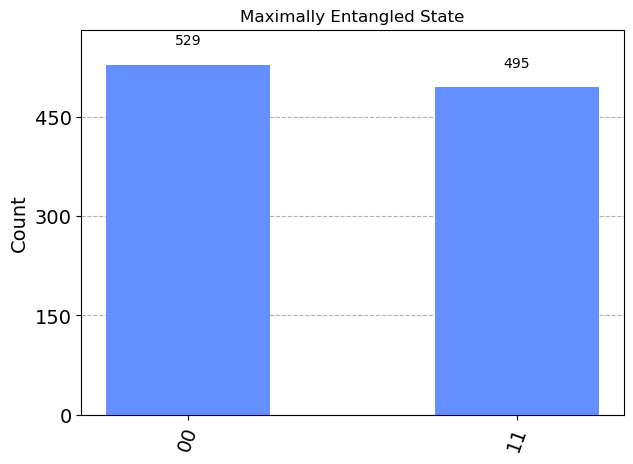

In [62]:
#executes numerous measurements
job=execute(entangler, M_simulator) 

#gives us histogram results 
hist=job.result().get_counts() 

#plot a stunning visualization
plot_histogram(data=hist, title="Maximally Entangled State")

## Flipping a Coin
***

In [63]:
# Flip one coin.
# binomial is a distribution which tells us the possibility of a variable will take one of two numbers/values
np.random.binomial(1, 0.5)

0

In [64]:
# Flip twenty coins.
# Random built in module to randomise numbers
np.random.binomial(1, 0.5, 20)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [65]:
# Flip a coin one hundred times, counting total heads.
# changes everytime
np.random.binomial(100, 0.5)

50

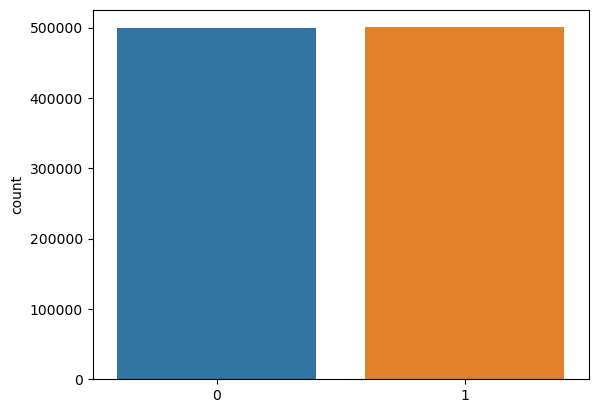

In [66]:
# Should be 50/50.
# show counts of observations
sns.countplot(x=np.random.binomial(1, 0.5, 1000000));

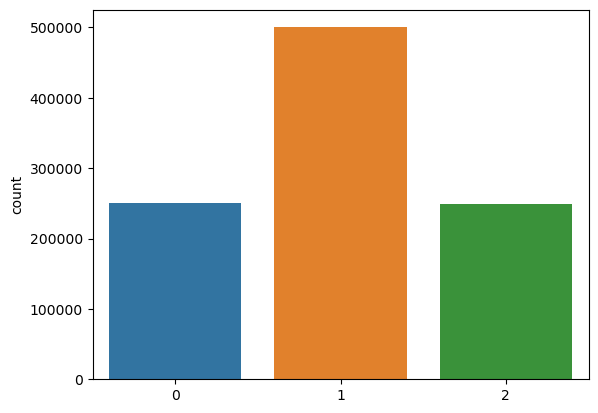

In [67]:
# Outcomes of flipping two coins.
sns.countplot(x=np.random.binomial(2, 0.5, 1000000));

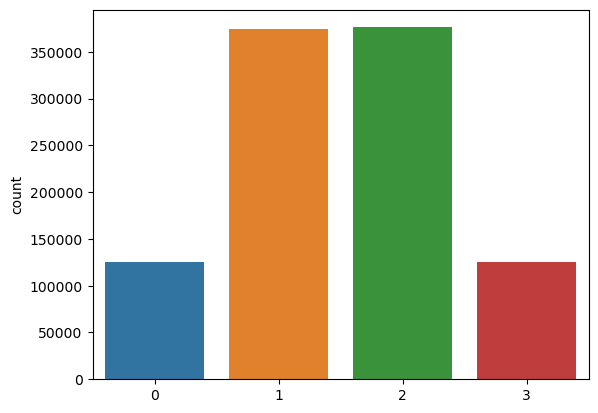

In [68]:
# Outcomes of flipping three coins.
sns.countplot(x=np.random.binomial(3, 0.5, 1000000));

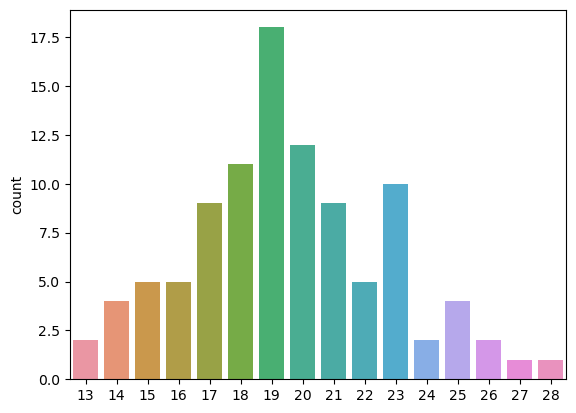

In [69]:
# Outcomes of flipping forty coins.
sns.countplot(x=np.random.binomial(40, 0.5, 100));

## Deutsch-Jozsa Algorithm
***
The Deutsch-Jozsa algorithm is was the first example of a quantum algorithm, that executes the classical algorithm better.

In [70]:
def f1(x):
    if x == 0:
        return 0
    else:
        return 0

In [71]:
def f2(x):
    if x == 0:
        return 0
    else:
        return 1

In [72]:
def f3(x):
    if x == 0:
        return 1
    else:
        return 0

In [73]:
def f4(x):
    if x == 0:
        return 1
    else:
        return 1

In [74]:
# Insert the above at random
# pointer to object f4 or f3 etc.
Y = [f1, f2, f3, f4]

f = random.choice(Y)

f(0)

0

In [75]:
# evaluate balenced constant
f(1)

0

In [76]:
list(itertools.product([0,1], repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [77]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=2))
    chosen_L = random.choice(possible_Ls)
    
    # defining a function inside a function
    # name is scoped
    def f(x):
        return chosen_L[x]
    return f

In [78]:
f = random_f() # when we invoke this and it creates f so long as we have a pointer to f, garbage collecter won't pick it up
# random f should now be gone off the stack after the above

In [79]:
f(0)

1

In [80]:
#constant
f(1)

1

In [81]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=3))
    chosen_L = random.choice(possible_Ls)
    
    # defining a function inside a function
    # name is scoped
    def f(x):
        return chosen_L[x]
    return f

In [82]:
f = random_f()

f(0)

1

In [83]:
f(1)

1

## Quantum Gates
***
Quantum gates are logic based gates definitely the quantum circuit model of computation, these operations are carried out by a small number of qubits and are the foundation of quantum circuits

### H Gate
***
A h gate is a Hadamard gate and is the most frequent used quantum gate in quantum computting, it is used to convert qubits from a clustered state to a uniform one.

#### [Hadamard Gate;](https://www.sciencedirect.com/topics/engineering/hadamard-gate)Sciencedirect

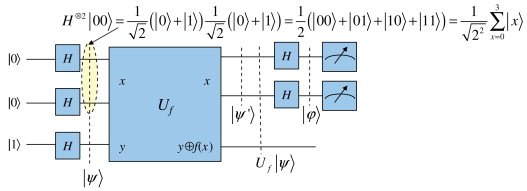

In [84]:
# Create a circuit which are collections of quantum gates
circuit = qiskit.QuantumCircuit(1, 1)

# Add a Hadamard gate.
circuit.h(0)

# Measure quantum bit into classical
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


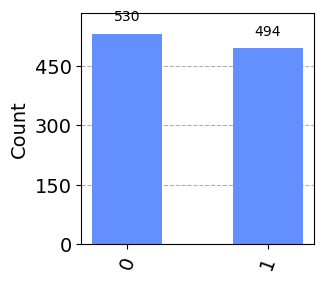

In [85]:
# Get a simulator, aer provides high perfomance quantum computing simulators
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit using run and get counts
result = sim.run(circuit).result().get_counts()

# plot the histogram using visualization
viz.plot_histogram(result, figsize=(3, 3))